## Definition


Exploratory Data Analysis (EDA) is the process of cleaning and reviewing data to derive insights such as descriptive statistics and correlation and generate hypothesis for experiments. EDA report informs the next step in data anlysis, whether that be generating hypothesis, preparing the data for use in a machine learning model, etc.

In [2]:
import pandas as pd
books = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [3]:
# check data types
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [4]:
divorce = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\divorce.csv")
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [8]:
divorce.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2205 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB


In [11]:
books['genre'].isin(['Fiction', 'Non Fiction'])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [12]:
books[books['genre'].isin(['Fiction', 'Non Fiction'])]

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction
...,...,...,...,...,...
344,Whose Boat Is This Boat?: Comments That Don't ...,The Staff of The Late Show with,4.6,2018,Non Fiction
345,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,2012,Non Fiction
346,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,2012,Fiction
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,2010,Non Fiction


In [13]:
# select only numerical columns
books.select_dtypes('number')

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019
...,...,...
345,4.4,2012
346,4.5,2012
347,4.2,2010
348,4.8,2013


In [2]:
books.groupby('genre').agg(
    mean_rating = ('rating', 'mean'),
    std_rating = ('rating', 'std'),
    median_year = ('year', 'median')
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


In [4]:
# check for missing values
books.isna().sum()

name      0
author    0
rating    0
year      0
genre     0
dtype: int64

In [7]:
divorce.isna().sum()

divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
dtype: int64

## Strategies for Addressing Missing Values

1. Drop missing values if they are 5% or less of all values
2. Impute the mean, median or mode, depending on the context, for the missing values
3. Impute by sub-groups

In [9]:
threshold = len(divorce) * 0.05
print(threshold) # if missing values for a column is <= threshold, drop them

110.45


In [10]:
# check for columns with missing values <= the threshold
cols_to_drop = divorce.columns[divorce.isna().sum() <= threshold]
print(cols_to_drop)

Index(['divorce_date', 'dob_man', 'education_man', 'income_man', 'dob_woman',
       'education_woman', 'income_woman', 'marriage_date',
       'marriage_duration'],
      dtype='object')


In [11]:
divorce.dropna(subset = cols_to_drop, inplace = True) # drop missing values for these columns

In [12]:
divorce.isna().sum()

divorce_date           0
dob_man                0
education_man          0
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             875
dtype: int64

In [13]:
# filter for remaining columns with missing values
cols_with_missing_values = divorce.columns[divorce.isna().sum() > 0]
print(cols_with_missing_values)

Index(['num_kids'], dtype='object')


In [17]:
# impute missing values by sub-group
divorce_dict = divorce.groupby("education_man")['num_kids'].median().to_dict()
print(divorce_dict)

{'Other': 2.0, 'Preparatory': 2.0, 'Primary': 2.0, 'Professional': 2.0, 'Secondary': 2.0}


In [18]:
divorce['num_kids'] = divorce['num_kids'].fillna(divorce['education_man'].map(divorce_dict))
divorce.isna().sum()

divorce_date         0
dob_man              0
education_man        0
income_man           0
dob_woman            0
education_woman      0
income_woman         0
marriage_date        0
marriage_duration    0
num_kids             0
dtype: int64

In [3]:
salaries = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\ds_salaries_clean.csv")
print(salaries.head())

   Working_Year                 Designation Experience Employment_Status  \
0          2020              Data Scientist        Mid                FT   
1          2020  Machine Learning Scientist     Senior                FT   
2          2020           Big Data Engineer     Senior                FT   
3          2020        Product Data Analyst        Mid                FT   
4          2020   Machine Learning Engineer     Senior                FT   

  Employee_Location Company_Size  Remote_Working_Ratio  Salary_USD  
0                DE            L                     0     76227.0  
1                JP            S                     0    248257.0  
2                GB            M                    50    104100.0  
3                HN            S                     0     19097.0  
4                US            L                    50    143225.0  


In [4]:
print(salaries['Designation'].value_counts())

Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                

In [7]:
# count number of unique values
print(salaries['Designation'].nunique())

50


In [8]:
# check job titles that contain 'scientist'
salaries['Designation'].str.contains('Scientist')

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [9]:
# check job titles that contain 'Machine Learning or AL'
salaries['Designation'].str.contains('Machine Learning|AI')

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [10]:
# check for job titles that starts with 'Data'
salaries['Designation'].str.contains('^Data')

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool

In [11]:
job_categories = ['Data Scientist', 'Data Analytics', 
                  'Data Engineering', 'Machine Learning',
                  'Managerial', 'Consultant']

In [16]:
data_science = 'Data Scientist|NLP'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
manager = 'Manager|Head|Director|Lead|Principal|Staff'
consultant = 'Consultant|Freelance'

In [17]:
conditions = [
    (salaries['Designation'].str.contains(data_science)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant))
]

In [20]:
import numpy as np
salaries['Job_Category'] = np.select(conditions,
                                     job_categories,
                                     default = 'Other')

In [21]:
print(salaries[['Designation', 'Job_Category']].head())

                  Designation      Job_Category
0              Data Scientist    Data Scientist
1  Machine Learning Scientist  Machine Learning
2           Big Data Engineer  Data Engineering
3        Product Data Analyst    Data Analytics
4   Machine Learning Engineer  Machine Learning


In [22]:
# add a summary statistic to your data
# use .transform() here because we want to create a column that has the same length as the original dataframe 
salaries['std_dev'] = salaries.groupby('Experience')['Salary_USD'].transform(lambda x: x.std())

In [23]:
print(salaries[['Experience', 'std_dev']])

    Experience       std_dev
0          Mid  61014.876754
1       Senior  55086.264071
2       Senior  55086.264071
3          Mid  61014.876754
4       Senior  55086.264071
..         ...           ...
602     Senior  55086.264071
603     Senior  55086.264071
604     Senior  55086.264071
605     Senior  55086.264071
606        Mid  61014.876754

[607 rows x 2 columns]


## Handling Outliers



An outlier is an observation far away from other data points

In [24]:
print(salaries['Salary_USD'].describe())

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64


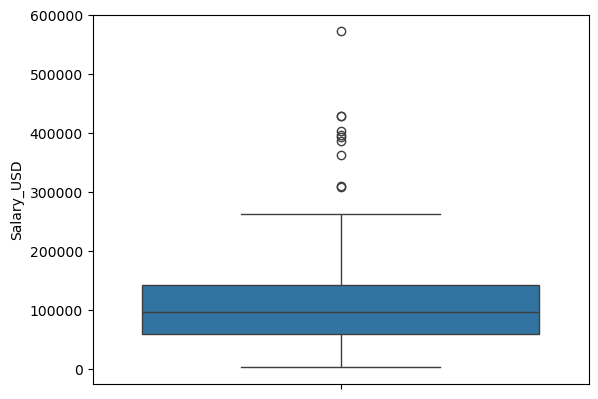

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data = salaries, y = 'Salary_USD')
plt.show()

###### Interquartile Range (IQR) = 75th percentile - 25th percentile
###### upper outliers > 75th percentile + (1.5 + IQR)
###### lower outliers < 25th percentile - (1.5 + IQR)

In [28]:
# 75th percentile
seventy_fifth = salaries['Salary_USD'].quantile(0.75)
seventy_fifth

143225.0

In [30]:
# 25th percentile
twenty_fifth = salaries['Salary_USD'].quantile(0.25)

In [31]:
# IQR
salaries_iqr = seventy_fifth - twenty_fifth


In [33]:
# upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)
lower = twenty_fifth - (1.5 * salaries_iqr)

In [35]:
# subset for outliers
salaries[(salaries['Salary_USD'] < lower) | (salaries['Salary_USD'] > upper)] \
    [['Experience', 'Employee_Location', 'Salary_USD']]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


In [38]:
# Dropping outliers
no_outliers = salaries[(salaries['Salary_USD'] > lower) & (salaries['Salary_USD'] < upper)]

## Patterns Over Time

When a csv file is imported into pandas, date and time data are typically interpreted as strings by default. We can fix that by adding the parse_dates keyword while importing the data

In [16]:
divorce = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\divorce.csv", parse_dates = ['divorce_date', 'dob_man', 'dob_woman'])
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object

The data types can also be updated to datatime data after import

In [9]:
divorce['marriage_date'] = pd.to_datetime(divorce['marriage_date'])
divorce.dtypes

divorce_date                 object
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [12]:
my_date = pd.DataFrame(
    {'month' : [6, 2],
     'day' : [23, 6],
     'year' : [2000, 2001]
    }
)
print(my_date)




   month  day  year
0      6   23  2000
1      2    6  2001


In [13]:
# use pd.to_datetime to convert month, day and year to a date column
my_date['new_date'] = pd.to_datetime(my_date[['month', 'day', 'year']])
print(my_date)

   month  day  year   new_date
0      6   23  2000 2000-06-23
1      2    6  2001 2001-02-06


In [15]:
# Extract month from a datetime column
divorce['marriage_month'] = divorce['marriage_date'].dt.month
print(divorce[['marriage_date', 'marriage_month']].head())

  marriage_date  marriage_month
0    2000-06-26               6
1    2001-09-02               9
2    2000-02-02               2
3    2006-05-13               5
4    2007-08-06               8


## Correlation

In [18]:
divorce.select_dtypes('number').corr()

,income_man,income_woman,marriage_duration,num_kids
income_man,1.000000,0.318047,0.085321,0.040848
income_woman,0.318047,1.000000,0.078677,-0.018015
marriage_duration,0.085321,0.078677,1.000000,0.447358
num_kids,0.040848,-0.018015,0.447358,1.000000


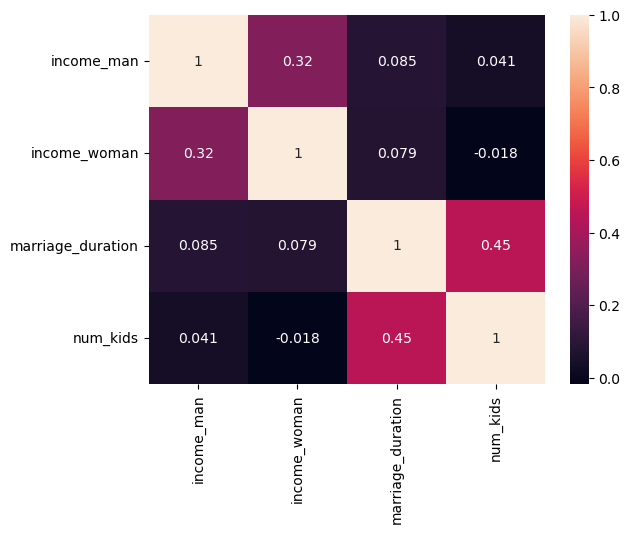

In [22]:
sns.heatmap(divorce.select_dtypes('number').corr(), annot = True)
plt.show()

## pd.cut()

pd.cut() is used to group a continuous variable into categorical bins

In [4]:
planes = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\planes.csv")

In [5]:
planes['Price'].describe()

count    10044.000000
mean      9044.411191
std       4472.304869
min       1759.000000
25%       5276.750000
50%       8366.000000
75%      12373.000000
max      54826.000000
Name: Price, dtype: float64

In [7]:
twenty_fifth = planes['Price'].quantile(0.25)
median = planes['Price'].median()
seventy_fifth = planes['Price'].quantile(0.75)
maximum = planes['Price'].max()

In [8]:
labels = ['Economy', 'Premium Economy', 'Business Class', 'First Class']
bins = [0, twenty_fifth, median, seventy_fifth, maximum]

planes['Price_Category'] = pd.cut(planes['Price'],
                                  labels = labels,
                                  bins = bins)

In [9]:
print(planes[['Price', 'Price_Category']].head())

     Price   Price_Category
0  13882.0      First Class
1   6218.0  Premium Economy
2  13302.0      First Class
3   3873.0          Economy
4  11087.0   Business Class
